# YOUR PROJECT TITLE

Imports and set magics:

In [50]:
%pip install pandas-datareader
%pip install matplotlib-venn

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
from scipy.stats.mstats import gmean

import pandas_datareader 
import pydst 

# Autoreload modules when code is run
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# User written modules
import dataproject


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

In [51]:
# Loading the data from Statistikbanken
filename1 = 'Kvinder.xlsx'
pd.read_excel(filename1).head(99)

,"Lønniveau efter køn, arbejdssted/bopæl, område og tid",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Enhed: Kr.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2,Kvinder,Bopælskommune,Hele landet,32609,33771,34253,35041,35514,36034,36718,37216,38071,38871,39715,40818,41606
3,NaN,NaN,København,34298,35418,36044,36808,37357,37912,38713,39232,40318,41327,42359,43664,44490
4,NaN,NaN,Frederiksberg,37771,39130,39900,40342,41225,41802,42625,43515,44581,45812,46888,48234,49120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,NaN,NaN,Jammerbugt,29960,30686,31040,31893,31999,32589,33118,33487,34326,34966,35777,36532,37484
95,NaN,NaN,Læsø,29091,30080,30385,31322,32187,32224,33005,32870,33858,34039,34571,36025,35832
96,NaN,NaN,Mariagerfjord,30277,31534,31575,32277,32585,33063,33591,33885,34493,35293,36080,36948,37784
97,NaN,NaN,Morsø,29683,30692,30854,31402,31341,32205,32445,32809,33748,34106,35095,36178,36767


In [80]:
# We are dropping rows
women = pd.read_excel(filename1, skiprows=2)

# We drop the first three columns
del women['Unnamed: 0'], women['Unnamed: 1']

# We rename the variable 'Unnamed: 2' 
women.rename(columns = {'Unnamed: 2':'City'},inplace=True)
col_dict = {}
for i in range(2009, 2021+1): # range goes from 2009 to 2021
    col_dict[str(i)] = f'women{i}' 
women.rename(columns = col_dict, inplace=True)

# We are only interesetd in the Cities so we drop the whole country
I = women.City.str.contains('NaN')
I |= women.City.str.contains('Hele landet')
women.loc[I, :]
women = women.loc[I == False]

# We reset the index 
women.reset_index(inplace = True, drop = True) # Drop old index too
women.iloc[0:99,:]

# We convert the index from wide to long
women_long = pd.melt(women, id_vars=['City'], var_name='year', value_name='women')
women_long['year'] = women_long['year'].str.extract('(\d+)', expand=False).astype(int)
women_long.head(99)


,City,year,women
0,København,2009,34298
1,Frederiksberg,2009,37771
2,Dragør,2009,38251
3,Tårnby,2009,33325
4,Albertslund,2009,32507
...,...,...,...
94,Morsø,2009,29683
95,Rebild,2009,31467
96,Thisted,2009,29694
97,Vesthimmerlands,2009,29597


In [69]:
# Loading the Data from statistikbanken
filename2 = 'Mænd.xlsx'
pd.read_excel(filename2).head(99)

,"Lønniveau efter køn, arbejdssted/bopæl, område og tid",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Enhed: Kr.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2,Mænd,Bopælskommune,Hele landet,38433,39754,40524,41294,41673,42050,42622,43071,43923,44693,45591,46487,47629
3,NaN,NaN,København,38693,40075,40993,41651,42256,42696,43585,44127,45366,46481,47639,48912,49800
4,NaN,NaN,Frederiksberg,44442,46528,47042,48142,48639,49211,50139,50950,52186,53425,54582,55658,56576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,NaN,NaN,Jammerbugt,34772,35808,35946,36695,36742,37387,38241,38685,39388,40117,40963,41653,42733
95,NaN,NaN,Læsø,34139,38258,37985,40077,41007,39969,39101,38300,37824,41182,39280,40123,39011
96,NaN,NaN,Mariagerfjord,34915,36409,36466,37455,37714,38153,38684,39018,39904,40589,41311,41842,42924
97,NaN,NaN,Morsø,32918,34059,33753,34653,34692,34875,35281,35920,36678,37476,38284,39047,40037


In [82]:
# Now we are dropping rows
men = pd.read_excel(filename2, skiprows=2)

# Now we drop the first three columns
del men['Unnamed: 0'], men['Unnamed: 1']

# Now we rename the variable 'Unnamed: 2' 
men.rename(columns = {'Unnamed: 2':'City'},inplace=True)
col_dict = {}
for i in range(2009, 2021+1): # range goes from 2009 to 2021
    col_dict[str(i)] = f'men{i}' 
men.rename(columns = col_dict, inplace=True)

# We are only interesetd in the Cities so we drop the whole country
I = men.City.str.contains('NaN')
I |= men.City.str.contains('Hele landet')
men.loc[I, :]
men = men.loc[I == False]

# We reset the index 
men.reset_index(inplace = True, drop = True) # Drop old index too
men.iloc[0:99,:]

# We convert the index from wide to long
men_long = pd.melt(men, id_vars=['City'], var_name='year', value_name='men')
men_long['year'] = men_long['year'].str.extract('(\d+)', expand=False).astype(int)
men_long.head(99)



,City,year,men
0,København,2009,38693
1,Frederiksberg,2009,44442
2,Dragør,2009,48092
3,Tårnby,2009,38744
4,Albertslund,2009,37040
...,...,...,...
94,Morsø,2009,32918
95,Rebild,2009,36614
96,Thisted,2009,33257
97,Vesthimmerlands,2009,33276


## Plotting the data

<AxesSubplot:xlabel='year'>

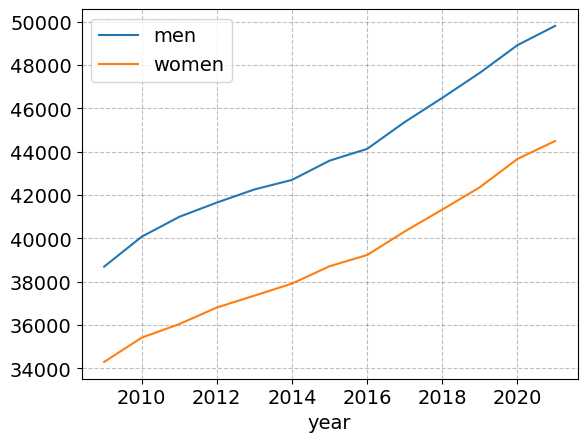

In [84]:
# Data with women
women_long_2 = women_long.reset_index()
women_long_2.loc[women_long_2.City == 'København', :]
women_copenhagen = women_long_2.loc[women_long_2['City'] == 'København', :]

# Data with men
men_long_2 = men_long.reset_index()
men_long_2.loc[men_long_2.City == 'København', :]
men_copenhagen = men_long_2.loc[men_long_2['City'] == 'København', :]

# Plotting
ax = men_copenhagen.plot(x='year', y='men', label = 'men')
women_copenhagen.plot(x='year', y='women', ax=ax)


The plot shows the difference in pay between men and women in Copenhagen from 2009 to 2021. The x-axis represents the years, while the y-axis represents the wage amount. In 2009, the average yearly wage for men was 38693 DKK, while for women it was 34298 DKK. Over the years, both groups experienced an increase in wages. However, there is a noticeable gender wage gap, with men consistently earning more than women in each year.

The difference in wages between men and women remains relatively consistent over time. For example, in 2010, men earned an average yearly wage of 40075 DKK, compared to women who earned 35418 DKK. In 2021, the gender wage gap was still present, with men earning an average of 49800 DKK, while women earned an average of 44490 Danish kroner.

It is worth noting that the wage gap between men and women in Copenhagen is consistent with the gender wage gap in Denmark as a whole. According to Statistics Denmark, in 2020, women earned approximately 12.2% less than men, with an average hourly wage of 141,50 DKK, compared to men's average hourly wage of 161,09 DKK.

In [86]:
# defiition of the plot function
def plot_func(df, City):
    # Function that operates on data set
    I = df['City'] == City
    ax=df.loc[I,:].plot(x='year', y='women', style='-o', legend=False)
 # setting the interactive widget
widgets.interact(plot_func, 
    df = widgets.fixed(women_long_2),
    County = widgets.Dropdown(description='City', 
                                    options=women_long_2.City.unique(), 
                                    value='København')
);



ValueError: cannot find widget or abbreviation for argument: 'City'

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

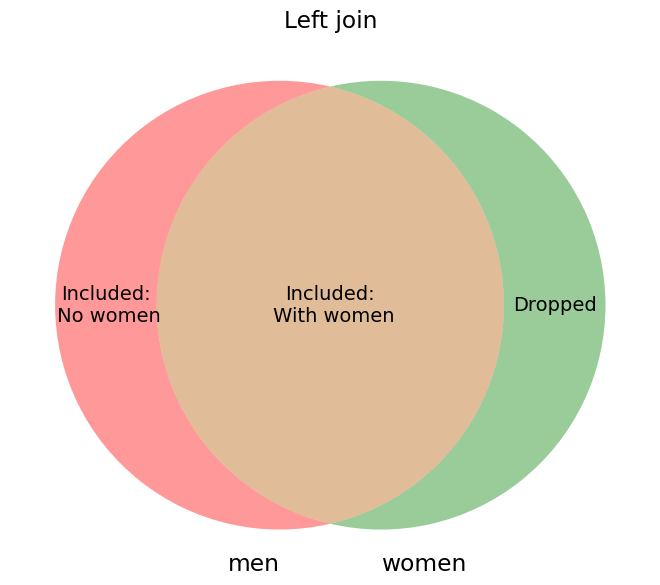

In [64]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('men', 'women'))
v.get_label_by_id('100').set_text('Included:\n No women')
v.get_label_by_id('010').set_text('Dropped' )
v.get_label_by_id('110').set_text('Included:\n With women')
plt.title('Left join')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

In [72]:
# We make a left join merge 
join = pd.merge(women, men, on='City', how='left')
join.head(99)

,City,women2009,women2010,women2011,women2012,women2013,women2014,women2015,women2016,women2017,...,men2012,men2013,men2014,men2015,men2016,men2017,men2018,men2019,men2020,men2021
0,København,34298,35418,36044,36808,37357,37912,38713,39232,40318,...,41651,42256,42696,43585,44127,45366,46481,47639,48912,49800
1,Frederiksberg,37771,39130,39900,40342,41225,41802,42625,43515,44581,...,48142,48639,49211,50139,50950,52186,53425,54582,55658,56576
2,Dragør,38251,39025,40591,41402,41644,42429,43785,44102,45306,...,53073,53531,53992,55234,57078,57765,59394,60548,61217,62891
3,Tårnby,33325,34113,35078,35412,35897,36468,37223,37724,38562,...,41151,41752,42069,42543,43254,44417,45676,46628,47539,48878
4,Albertslund,32507,33764,34219,35147,35287,35864,36241,36676,37261,...,39079,39764,39923,40460,40563,41284,41738,42798,43484,44636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Morsø,29683,30692,30854,31402,31341,32205,32445,32809,33748,...,34653,34692,34875,35281,35920,36678,37476,38284,39047,40037
95,Rebild,31467,32216,32716,33501,33827,34583,35049,35606,36710,...,39604,39651,40543,41182,41825,42631,43533,44538,45249,46381
96,Thisted,29694,30589,30839,31627,31852,32233,32560,33110,34051,...,35383,35900,36113,36352,36766,37379,38059,38514,39292,40469
97,Vesthimmerlands,29597,30558,30851,31118,31438,32261,32558,33107,33629,...,34263,34489,35222,35989,37012,37306,38258,38653,39768,40550


In [75]:
join_long = join.melt(id_vars=['City'], var_name = 'Year', value_name='Salary')
join_long['Gender'] = join_long['Year'].str[:-4]
join_long['Year'] = join_long['Year'].str[-4:]
join_long['City'] = join_long['City'].str.slice(start=9)
join_long.sort_values(['Year', 'City'], ignore_index=True)

,City,Year,Salary,Gender
0,,2009,34298,women
1,,2009,38251,women
2,,2009,33325,women
3,,2009,34963,women
4,,2009,32442,women
...,...,...,...,...
2673,NaN,2021,NaN,women
2674,NaN,2021,NaN,men
2675,NaN,2021,NaN,men
2676,NaN,2021,NaN,men


# Analysis

In [103]:
# We calculate the growthrate and the geometric mean for women
women_copenhagen['Growth Rate'] = (women_copenhagen['women'].pct_change(periods=1) * 100)

# We drop the NaN value from the dataset 
women_copenhagen2 = women_copenhagen.tail(-1)

gm1 = (gmean(women_copenhagen2['Growth Rate'] / 100 + 1)-1)*100
print ("%.2f" % gm1)
women_copenhagen2['Geometric mean'] = gm1
women_copenhagen2['Difference'] = women_copenhagen2.Growth_Rate - women_copenhagen2.Gmean
women_copenhagen2.head(10)

2.19


/var/folders/jf/wvx5z8gs0pb_16dvq2x7qv280000gn/T/ipykernel_18799/3183589473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_copenhagen['Growth Rate'] = (women_copenhagen['women'].pct_change(periods=1) * 100)
/var/folders/jf/wvx5z8gs0pb_16dvq2x7qv280000gn/T/ipykernel_18799/3183589473.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_copenhagen2['Geometric mean'] = gm1
/var/folders/jf/wvx5z8gs0pb_16dvq2x7qv280000gn/T/ipykernel_18799/3183589473.py:8: SettingWithCopyWarning: 
A value is trying

,index,City,year,women,Growth_Rate,Gmean,D_Gmean,Growth Rate,Geometric mean,Difference
101,101,København,2010,35418,3.265497,2.108962,1.156534,3.265497,2.19182,1.156534
202,202,København,2011,36044,1.767463,2.108962,-0.341500,1.767463,2.19182,-0.341500
303,303,København,2012,36808,2.119632,2.108962,0.010669,2.119632,2.19182,0.010669
404,404,København,2013,37357,1.491524,2.108962,-0.617439,1.491524,2.19182,-0.617439
505,505,København,2014,37912,1.485665,2.108962,-0.623297,1.485665,2.19182,-0.623297
606,606,København,2015,38713,2.112788,2.108962,0.003825,2.112788,2.19182,0.003825
707,707,København,2016,39232,1.340635,2.108962,-0.768327,1.340635,2.19182,-0.768327
808,808,København,2017,40318,2.768148,2.108962,0.659186,2.768148,2.19182,0.659186
909,909,København,2018,41327,2.502604,2.108962,0.393642,2.502604,2.19182,0.393642
1010,1010,København,2019,42359,2.497157,2.108962,0.388194,2.497157,2.19182,0.388194


In [104]:
# We calculate the growthrate and the geometric mean for men
men_copenhagen['Growth Rate'] = (men_copenhagen['men'].pct_change(periods=1) * 100)

# We drop the NaN value from the dataset 
men_copenhagen2 = men_copenhagen.tail(-1)

gm1 = (gmean(men_copenhagen2['Growth Rate'] / 100 + 1)-1)*100
print ("%.2f" % gm1)
men_copenhagen2['Geometric mean'] = gm1
men_copenhagen2['Difference'] = men_copenhagen2.Growth_Rate - men_copenhagen2.Gmean
men_copenhagen2.head(10)

2.13


/var/folders/jf/wvx5z8gs0pb_16dvq2x7qv280000gn/T/ipykernel_18799/3143890928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_copenhagen['Growth Rate'] = (men_copenhagen['men'].pct_change(periods=1) * 100)
/var/folders/jf/wvx5z8gs0pb_16dvq2x7qv280000gn/T/ipykernel_18799/3143890928.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_copenhagen2['Geometric mean'] = gm1
/var/folders/jf/wvx5z8gs0pb_16dvq2x7qv280000gn/T/ipykernel_18799/3143890928.py:10: SettingWithCopyWarning: 
A value is trying to be 

,index,City,year,men,Growth_Rate,Gmean,D_Gmean,Geometric mean,Difference,Growth Rate
101,101,København,2010,40075,3.571705,2.007721,1.563985,2.125237,1.563985,3.571705
202,202,København,2011,40993,2.290705,2.007721,0.282984,2.125237,0.282984,2.290705
303,303,København,2012,41651,1.605152,2.007721,-0.402569,2.125237,-0.402569,1.605152
404,404,København,2013,42256,1.452546,2.007721,-0.555175,2.125237,-0.555175,1.452546
505,505,København,2014,42696,1.041272,2.007721,-0.966449,2.125237,-0.966449,1.041272
606,606,København,2015,43585,2.082162,2.007721,0.074442,2.125237,0.074442,2.082162
707,707,København,2016,44127,1.243547,2.007721,-0.764174,2.125237,-0.764174,1.243547
808,808,København,2017,45366,2.807805,2.007721,0.800084,2.125237,0.800084,2.807805
909,909,København,2018,46481,2.457788,2.007721,0.450067,2.125237,0.450067,2.457788
1010,1010,København,2019,47639,2.491341,2.007721,0.483620,2.125237,0.483620,2.491341


/Users/bruger/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fd0c0e90880> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/Users/bruger/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fd0c11f49d0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


<AxesSubplot:title={'center':'Growth rate, Copenhagen'}, xlabel='year'>

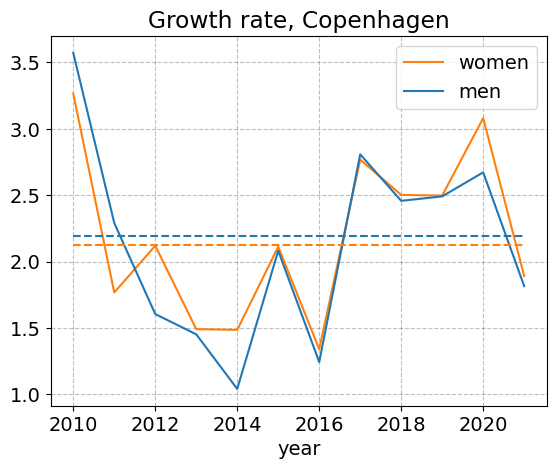

In [114]:
# Plotting growth rate and the geometric mean
ax = women_copenhagen2.plot(x='year', y='Growth Rate', label = 'women', color='tab:orange')
ax = men_copenhagen2.plot(x='year', y='Growth Rate', label = 'men', color='tab:blue', ax=ax)
ax = women_copenhagen2.plot(x='year', y='Geometric mean', color='tab:blue', linestyle='--', label='_nolegend_', ax=ax)
men_copenhagen2.plot(x='year', y='Geometric mean', color='tab:orange', linestyle='--', label='_nolegend_', title='Growth rate, Copenhagen', ax=ax)

Tekst her

# Conclusion

ADD CONCISE CONLUSION.